### 2nd European Conference on Social Networks, June 14-17, 2016, Paris (http://eusn2016.sciencesconf.org/)
## Workshop 12:
# EXTRACTING SOCIAL NETWORKS FROM LITERARY TEXT
# III. Comparing Networds of Common Noun Phrases in Two Texts
## By Moses Boudourides (<mailto:Moses.Boudourides@gmail.com>) and Sergios Lenis (<mailto:sergioslenis@gmail.com>) 
## University of Patras, Greece

**IMPORTANT**: To use this notebook, you'll need to

1. Install IPython Notebook (easiest way: use [Anaconda](http://store.continuum.io))
2. Download this notebook and all other Python scripts used here from [https://github.com/mboudour/WordNets/blob/master/EUSN2016_LiteraryTextNetworksWorkshop](https://github.com/mboudour/WordNets/blob/master/EUSN2016_LiteraryTextNetworksWorkshop)
3. Run `ipython notebook` in the same directory where notebook and scripts were put

<a href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

<p>
**Table of Contents**

[I. Importing the Text & Detecting Common Noun Phrases](#I)

[II. The Networks of Common Noun Phrases](#II)

## Importing Python modules

In [1]:
import random
import nltk
import codecs
from textblob import TextBlob
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
import imp
import seaborn as sns       # pip install seaborn
sns.set_style("white")      # For seaborn to show axes in iPython Notebook
from lightning import Lightning
from numpy import random, asarray, sqrt, arctan2, pi, clip
from seaborn import color_palette
from sklearn import datasets
from colorsys import hsv_to_rgb
import itertools
from nltk.tokenize import sent_tokenize, word_tokenize

# utilsdir='/Users/mosesboudourides/Dropbox/Python Projects/EUSN2016_LiteraryTextNetworksWorkshop/utils/'
# utilsdir='/home/mab/Dropbox/Python Projects/utils/'#tools.py'
utilsdir='/home/mab/Dropbox/Python Projects/EUSN2016_LiteraryTextNetworksWorkshop/utils/'
# utilsdir='/home/sergios-len/Dropbox/Python Projects (1)/EUSN2016_LiteraryTextNetworksWorkshop/utils/'

%matplotlib inline 
%load_ext autoreload

/home/mab/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# The case of Clinton-Trump's 2016 Speeches on National Security

<a id='I'></a>
## I. Importing the Text & Detecting Common Noun Phrases

In [2]:
# The transcript of Hillary Clinton’s Speech on National Security on 6-2-2016 was downloaded from 
# https://www.hillaryclinton.com/briefing/statements/2016/06/02/transcript-hillary-clinton-delivers-major-national-security-address/ (accessed on 6-10-2016)
# The transcript of Donald Trump's Speech on National Security on 4-27-2016 was downloaded from 
# http://www.nytimes.com/2016/04/28/us/politics/transcript-trump-foreign-policy.html?_r=0 (accessed on 6-10-2016)

filenameA = 'texts/HilaryClintonOnNationalScurity6-2-2016.txt'
filenameB = 'texts/DonaldTrumpOnNationalSecurity4-27-2016.txt'
titlenameA = "Hillary Clinton's Speech on National Security, 6-2-2016"
titlenameB = "Donald Trump's Speech on National Security, 4-27-2016"
ttA = "Hillary Clinton's speech"
ttB = "Donald Trump's speech"
nnA = "Hillary Clinton's noun phrases"
nnB = "Donald Trump's noun phrases"
wwA = "Hillary Clinton's Network of Common Noun Phrases"
wwB = "Donald Trump's Network of Common Noun Phrases"

fA = codecs.open(filenameA, "r", encoding="utf-8").read()
fB = codecs.open(filenameB, "r", encoding="utf-8").read()

### *Noun phrases* are words or groups of words containing a noun and functioning in a sentence as subject, object, or prepositional object.

In [3]:
num_linesA = 0
num_wordsA = 0
num_charsA = 0
for line in fA:
    words = line.split()
    num_linesA += 1
    num_wordsA += len(words)
    num_charsA += len(line)
print "%s, has number of words = %i and number of characters = %i" %(titlenameA,num_wordsA,num_charsA)
num_linesB = 0
num_wordsB = 0
num_charsB = 0
for line in fB:
    words = line.split()
    num_linesB += 1
    num_wordsB += len(words)
    num_charsB += len(line)
print "%s, has number of words = %i and number of characters = %i" %(titlenameB,num_wordsB,num_charsB)

blobA = TextBlob(fA)
blobB = TextBlob(fB)

npA = blobA.np_counts
npB = blobB.np_counts

Hillary Clinton's Speech on National Security, 6-2-2016, has number of words = 19877 and number of characters = 25667
Donald Trump's Speech on National Security, 4-27-2016, has number of words = 23835 and number of characters = 28940


In [4]:
dfnp1 = pd.DataFrame(columns=[nnA, "Frequencies"])
dfnp2 = pd.DataFrame(columns=[nnB, "Frequencies"])

u=1
for l in npA: 
    dfnp1.loc[u]=[l,npA[l]]
    u+=1
u=1
for l in npB: 
    dfnp2.loc[u]=[l,npB[l]]                  
    u+=1

print "The total number of noun phrases in %s is %i" %(ttA,len(npA))
cdfnp1 = dfnp1.drop(dfnp1.index[[]])
sdfnp1 = cdfnp1.sort_values(by=['Frequencies'], ascending=False)
sdfnp1.head(10)

The total number of noun phrases in Hillary Clinton's speech is 295


,Hillary Clinton's noun phrases,Frequencies
272,america,29.0
266,donald trump,20.0
51,isis,12.0
110,iran,10.0
223,trump,6.0
121,china,5.0
151,russia,5.0
20,thank,5.0
109,korea,5.0
137,muslims,4.0


In [5]:
print "The total number of noun phrases in %s is %i" %(ttB,len(npB))
cdfnp2 = dfnp2.drop(dfnp2.index[[]])
sdfnp2 = cdfnp2.sort_values(by=['Frequencies'], ascending=False)
sdfnp2.head(10)

The total number of noun phrases in Donald Trump's speech is 297


,Donald Trump's noun phrases,Frequencies
274,america,23.0
128,foreign policy,18.0
135,china,12.0
201,obama,10.0
113,iran,8.0
203,isis,7.0
19,islam,7.0
17,cold,6.0
221,trump,6.0
125,york,6.0


In [6]:
common={}
ncommon={}
dfc=pd.DataFrame(columns=["Common noun phrases", ttA, ttB])
u=1
for l in npA:  
    if l in npB:
        common[l]=min(npA[l],npB[l])
        ncommon[l]=(npA[l],npB[l])        
        dfc.loc[u]=[l,npA[l],npB[l]]
        u+=1
# dfc = dfc.sort_values(by=[ttA], ascending=False)
dfc

,Common noun phrases,Hillary Clinton's speech,Donald Trump's speech
1,thank,5.0,5.0
2,common sense,1.0,1.0
3,wo n't,1.0,4.0
4,isis,12.0,7.0
5,ca n't,2.0,3.0
6,friends need,1.0,1.0
7,copenhagen,1.0,1.0
8,active duty,1.0,1.0
9,korea,5.0,3.0
10,iran,10.0,8.0


In [7]:
cdfc = dfc.drop(dfc.index[[0,2,4,22,23,25,27,28,31]])
cdfc = cdfc.sort_values(by=[ttA], ascending=False)
cdfc

,Common noun phrases,Hillary Clinton's speech,Donald Trump's speech
27,america,29.0,23.0
4,isis,12.0,7.0
10,iran,10.0,8.0
16,russia,5.0,4.0
9,korea,5.0,3.0
12,china,5.0,12.0
22,nuclear weapon,4.0,3.0
31,american people,3.0,2.0
15,syria,3.0,2.0
21,obama,3.0,10.0


In [8]:
# to_be_removed = [u'well',u'thank',u'york']
# for key in common.keys():
#     if key in to_be_removed:
#         del common[key]
# ccommon=common.keys()
# print ccommon

ccommon=cdfc['Common noun phrases'].tolist()

<a id='II'></a>
## II. The Networks of Common Noun Phrases

In [9]:
def occurrences(source,terms):
    ALL_sentences=sent_tokenize(source)
    combinations_terms = list(itertools.combinations(terms,2))
    n = len(combinations_terms)
#     print n,combinations_terms[0]
#     print ALL_sentences[0]
#     print ALL_sentences[1]
    occurlist =[]
    for i in range(n):
        for j in ALL_sentences:
            temp= list(combinations_terms[i])
            
            out  = re.compile(str(temp[0])+'(.*?)'+str(temp[1]), re.DOTALL |  re.IGNORECASE).findall(j)
            if out :
                occurlist.append(tuple(temp))
            out2  = re.compile(str(temp[1])+'(.*?)'+str(temp[0]), re.DOTALL |  re.IGNORECASE).findall(j)
            if out2 :
                occurlist.append(tuple(temp))
    occurdict={}
    for i in occurlist:
        if i not in occurdict:
            occurdict[i] = 1
        else:
            occurdict[i] = occurdict[i]+1
    return occurdict

HCdict = occurrences(fA,ccommon)
BSdict = occurrences(fB,ccommon)

def makegraph(occurrences):
    G = nx.Graph()
    for ed,wei in occurrences.items():    
        G.add_edge(ed[0],ed[1],weight=wei)
        G.add_node(ed[0],label=ed[0])
        G.add_node(ed[1],label=ed[1])
    return G

GHC = makegraph(HCdict)
GBS = makegraph(BSdict)

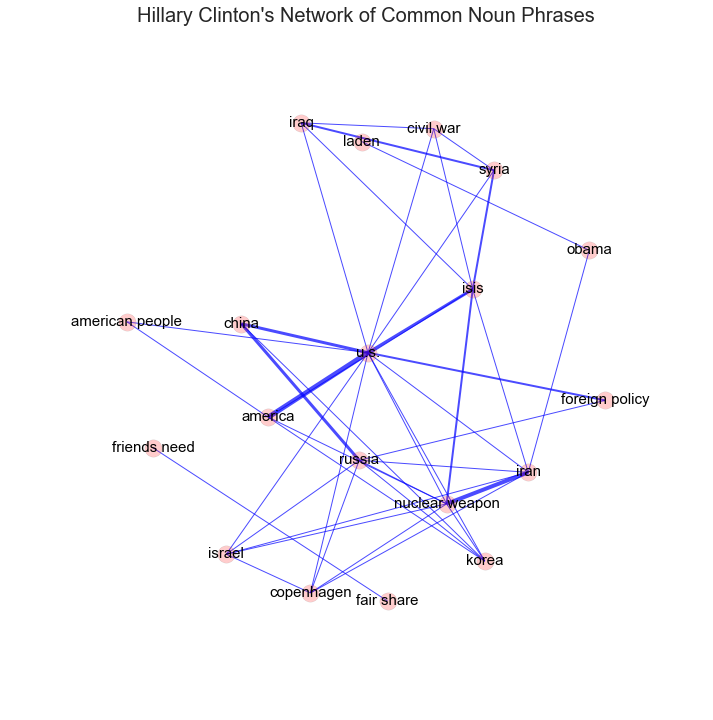

In [10]:
%autoreload 2
tool= imp.load_source('tools', utilsdir+'tools.py')

posHC=nx.spring_layout(GHC,scale=50,k=0.4,iterations=20)
# posHC=nx.graphviz_layout(GHC)
sstt=wwA
posit=tool.draw_network(GHC,sstt,pos=posHC,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15)

### Centralities of Nodes

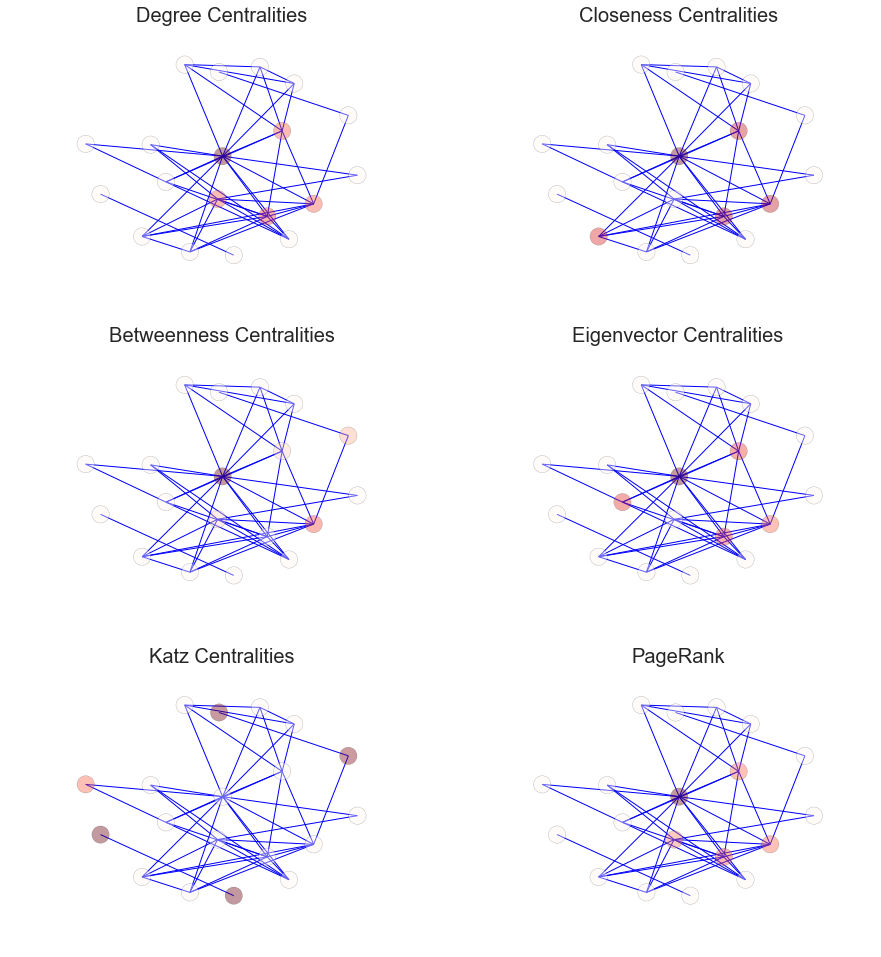

In [11]:
from tools import draw_centralities_subplots

centrali=draw_centralities_subplots(GHC,pos=posHC,withLabels=False,labfs=5,figsi=(15,22),ealpha=1,vals=True)

In [12]:
dfc=pd.DataFrame()
u=0
for i,k in centrali.items():
    dfc.insert(u,i,k.values())
    u+=1
dfc.insert(0,'Nodes',centrali[centrali.keys()[0]].keys())
dfc

,Nodes,closeness_centrality,katz_centrality,betweenness_centrality,page_rank,eigenvector_centrality,degree_centrality
0,israel,0.507937,-0.015066,0.003839,0.076386,1.501364e-01,0.277778
1,korea,0.474074,-0.012351,0.013279,0.038751,1.679168e-01,0.277778
2,nuclear weapon,0.568889,-0.107116,0.043780,0.037691,2.769688e-01,0.444444
3,laden,0.268344,0.448635,0.000000,0.083018,2.791155e-03,0.055556
4,u.s.,0.711111,-0.017678,0.340595,0.021933,5.453008e-01,0.722222
5,syria,0.444444,-0.118788,0.000000,0.148274,1.638841e-01,0.222222
6,american people,0.418301,0.241320,0.000000,0.019574,9.115732e-02,0.111111
7,civil war,0.444444,-0.035608,0.000000,0.032645,1.195736e-01,0.222222
8,friends need,0.055556,0.462096,0.000000,0.052632,2.788941e-35,0.055556
9,china,0.444444,-0.150226,0.003839,0.063006,2.377948e-01,0.166667


### Communities of Nodes 

Number of communities of Hillary Clinton's Network of Common Noun Phrases = 5
Community partition of Hillary Clinton's Network of Common Noun Phrases:
[[u'israel', u'iran', u'nuclear weapon', u'copenhagen', u'obama', u'laden'], [u'korea', u'china', u'russia'], [u'u.s.', u'foreign policy', u'america', u'american people'], [u'iraq', u'isis', u'civil war', u'syria'], [u'friends need', u'fair share']]
Community modularity of Hillary Clinton's Network of Common Noun Phrases = 0.3137


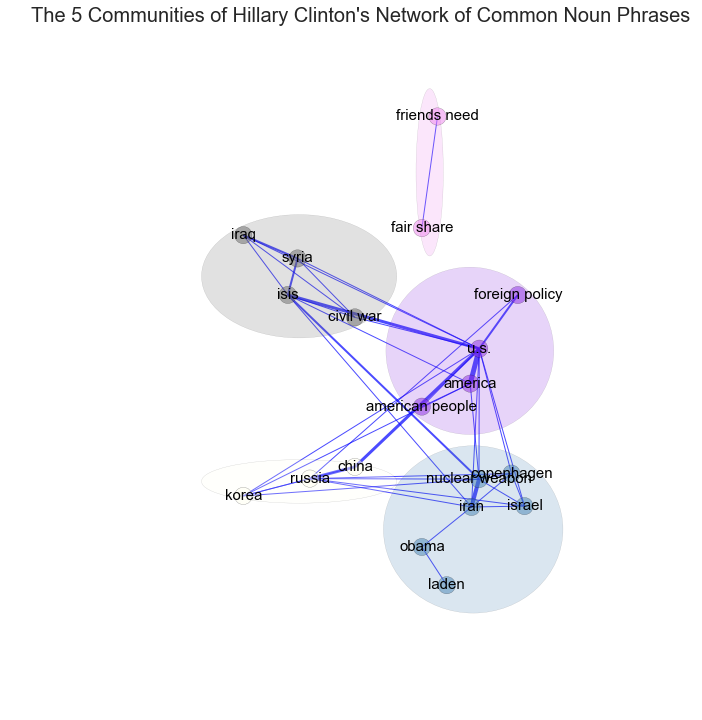

In [13]:
%autoreload 2
from tools import draw_comms, modul_arity, print_communities

part,nodper=print_communities(GHC,sstt)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.7
vcc={}
sstta="The %s Communities of %s" %(max(part.values())+1,sstt)

draw_comms(GHC,GHC.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=15,valpha=0.5)

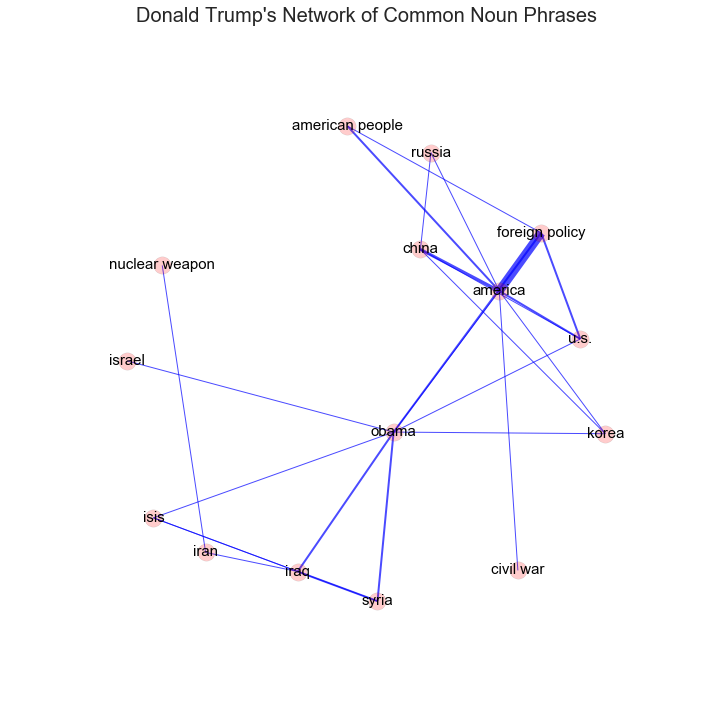

In [14]:
posBS=nx.spring_layout(GBS,scale=50,k=0.4,iterations=20)
# posBS=nx.graphviz_layout(GHC)
sstt=wwB
posit=tool.draw_network(GBS,sstt,pos=posBS,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15)

### Centralities of Nodes

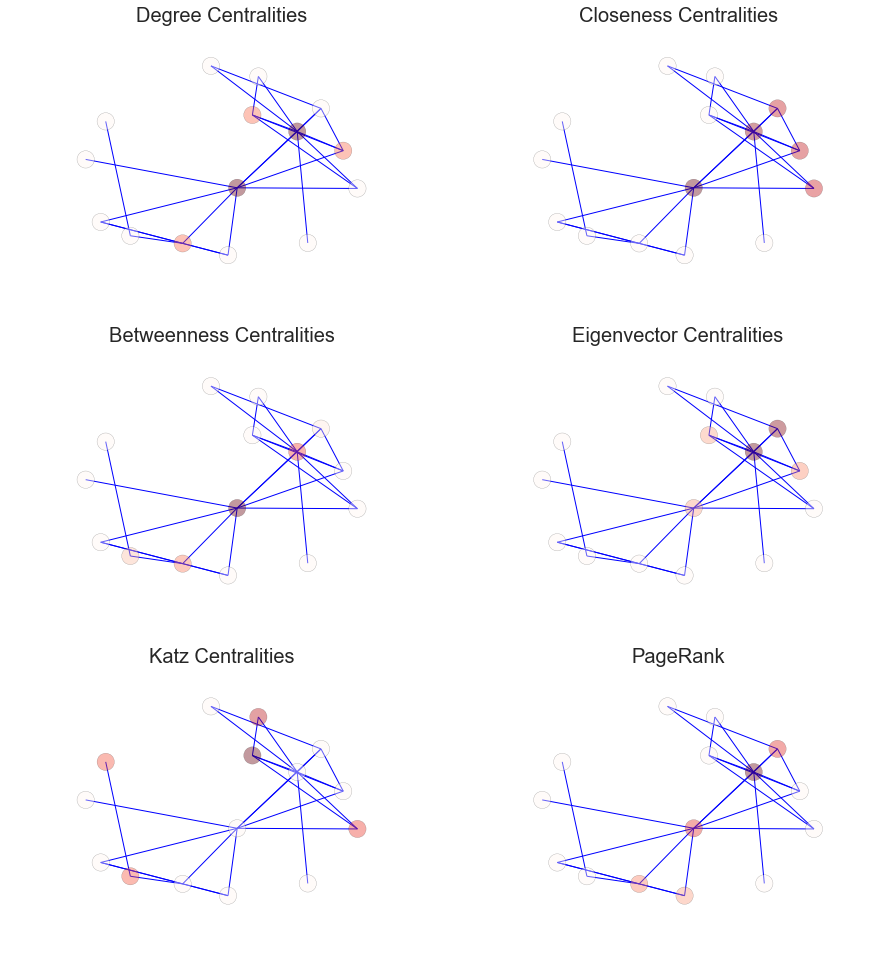

In [15]:
centrali=draw_centralities_subplots(GBS,pos=posBS,withLabels=False,labfs=5,figsi=(15,22),ealpha=1,vals=True)

In [16]:
dfc=pd.DataFrame()
u=0
for i,k in centrali.items():
    dfc.insert(u,i,k.values())
    u+=1
dfc.insert(0,'Nodes',centrali[centrali.keys()[0]].keys())
dfc

,Nodes,closeness_centrality,katz_centrality,betweenness_centrality,page_rank,eigenvector_centrality,degree_centrality
0,israel,0.411765,0.033321,0.000000,0.020063,0.075094,0.071429
1,korea,0.500000,0.359037,0.025641,0.037788,0.018916,0.214286
2,nuclear weapon,0.269231,0.322837,0.000000,0.030370,0.094010,0.071429
3,isis,0.466667,-0.035464,0.000000,0.043511,0.004345,0.214286
4,u.s.,0.518519,-0.005051,0.031136,0.062220,0.207998,0.285714
5,american people,0.400000,-0.080256,0.000000,0.034714,0.056862,0.142857
6,civil war,0.388889,0.111031,0.000000,0.018332,0.048867,0.071429
7,china,0.424242,0.566090,0.014652,0.066301,0.609416,0.285714
8,iraq,0.500000,-0.012946,0.263736,0.085496,0.027511,0.285714
9,syria,0.466667,-0.100181,0.000000,0.066679,0.000381,0.214286


### Communities of Nodes 

Number of communities of Donald Trump's Network of Common Noun Phrases = 2
Community partition of Donald Trump's Network of Common Noun Phrases:
[[u'israel', u'iran', u'isis', u'syria', u'nuclear weapon', u'iraq', u'obama'], [u'korea', u'u.s.', u'american people', u'civil war', u'america', u'china', u'foreign policy', u'russia']]
Community modularity of Donald Trump's Network of Common Noun Phrases = 0.3330


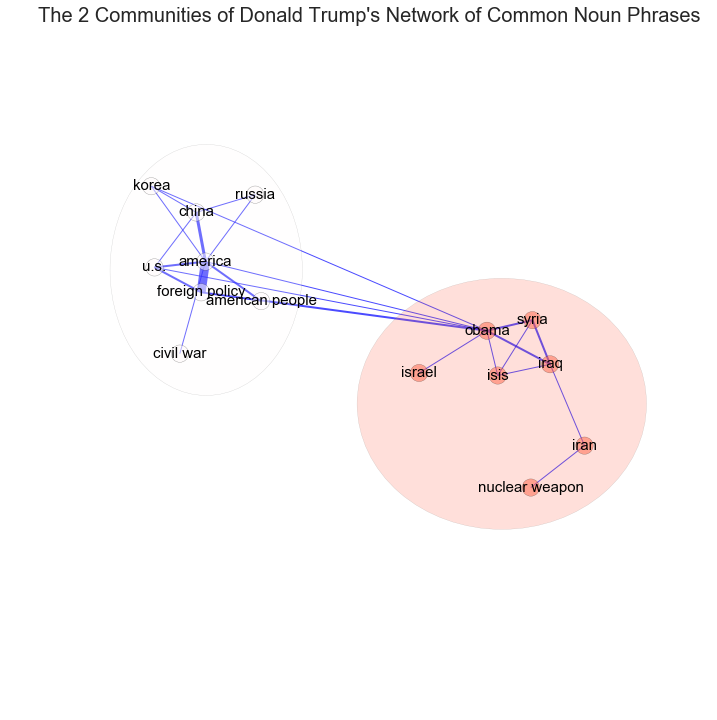

In [17]:
part,nodper=print_communities(GBS,sstt)

# d=0.8 
# dd=0.8
# c=1.2
# cc=1.4
# alpha=0.2
# ealpha=.7
# vcc={}
sstta="The %s Communities of %s" %(max(part.values())+1,sstt)

draw_comms(GBS,GBS.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=15,valpha=0.5)

### Comparing the Two Networks of Common Noun Phrases

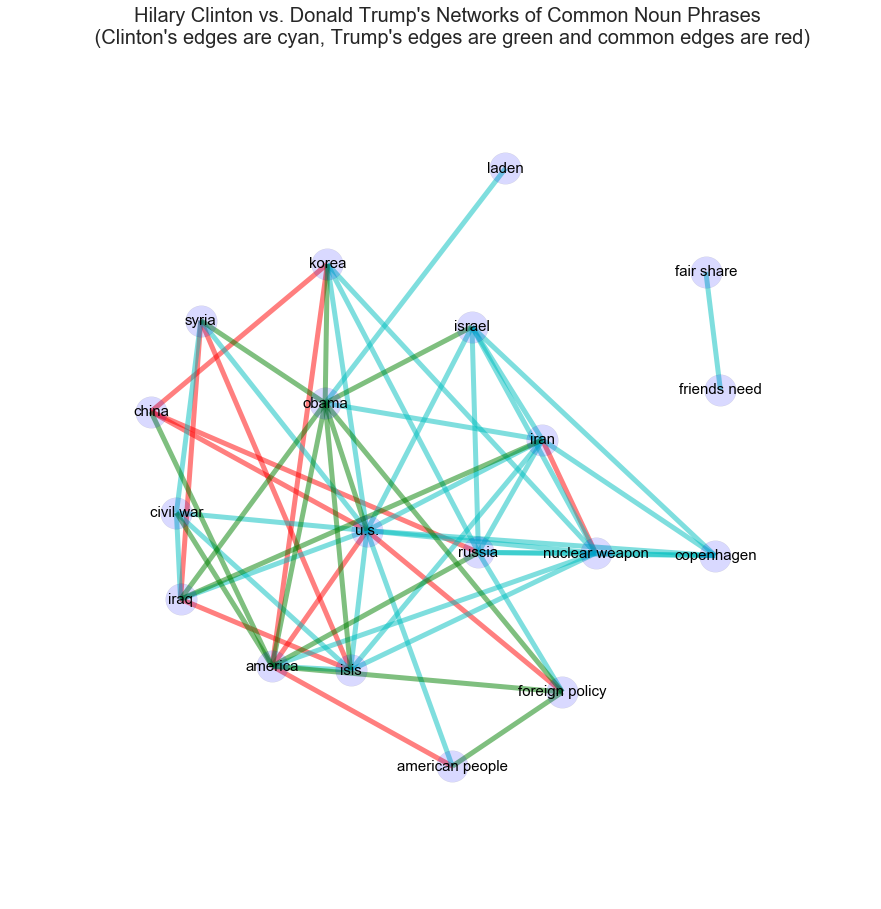

In [18]:
G = nx.Graph()
G.add_edges_from(GHC.edges())
G.add_edges_from(GBS.edges())

pos=nx.spring_layout(G,scale=50,k=0.4,iterations=20)
# pos=nx.graphviz_layout(G)
sstt="Hilary Clinton vs. Donald Trump's Networks of Common Noun Phrases \n (Clinton's edges are cyan, Trump's edges are green and common edges are red)"
plt.figure(figsize=(15,15))
G1 = GHC.to_directed()
G2 = GBS.to_directed()
X=nx.Graph()
X.add_edges_from(list(set(G1.edges()).intersection(set(G2.edges()))))
HCandBSedges = list(X.edges())
HCedges = [e for e in GHC.edges() if e not in list(set(G1.edges()).intersection(set(G2.edges())))]
BSedges = [e for e in GBS.edges() if e not in list(set(G1.edges()).intersection(set(G2.edges())))]

nx.draw_networkx_nodes(G,pos,withLabels=True,node_color='b',node_size=1000,alpha=0.15)
# nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,edgelist=HCandBSedges,width=5,alpha=0.5,edge_color='red')
nx.draw_networkx_edges(G,pos,edgelist=HCedges,width=5,alpha=0.5,edge_color='c')
nx.draw_networkx_edges(G,pos,edgelist=BSedges,width=5,alpha=0.5,edge_color='g')
nx.draw_networkx_labels(G,pos=pos,font_size=15)
plt.title(sstt,fontsize=20)
kk=plt.axis('off')